In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AutoReg, ARResults

In [3]:
df = pd.read_csv('Data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [4]:
train = df.iloc[:84]
test = df.iloc[84:]

In [5]:
model = AutoReg(train['PopEst'], lags=1)
AR1fit = model.fit()

In [6]:
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [7]:
start = len(train)
end = len(train) + len(test) - 1

In [8]:
prediction1 = AR1fit.predict(start, end)

In [9]:
prediction1.rename('AR prediction')
prediction1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

<Axes: xlabel='DATE'>

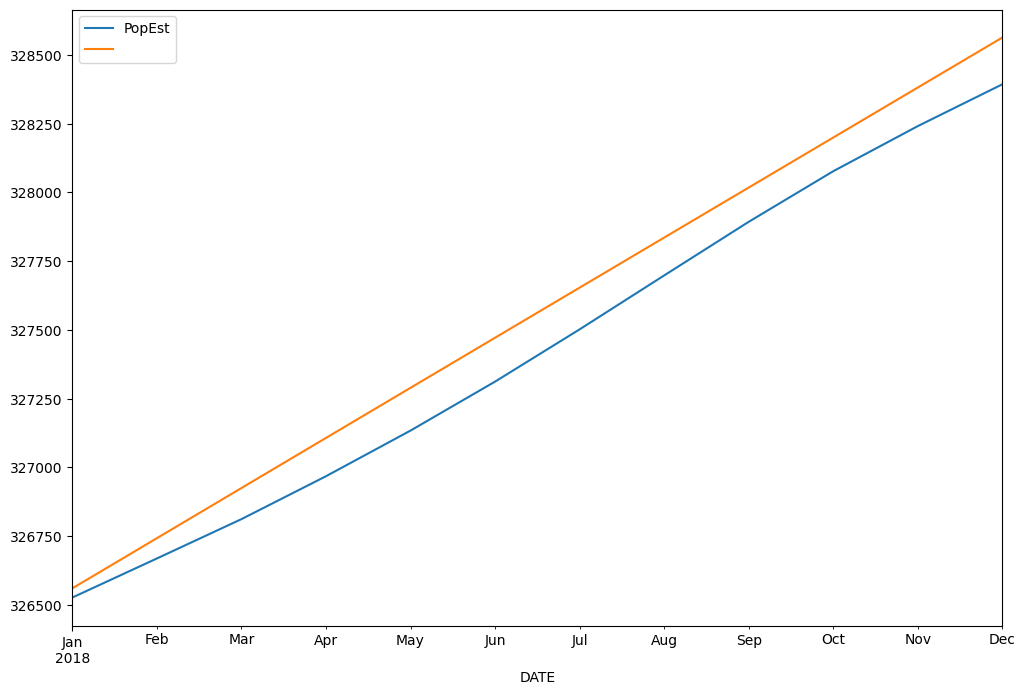

In [10]:
test.plot(figsize=(12,8),legend=True)
prediction1.plot(legend=True)

In [11]:
AR2fit = AutoReg(train, lags=2).fit()
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [12]:
prediction2 = AR2fit.predict(start, end)
prediction2.rename('AR 2 prediction')

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944949
2018-05-01    327177.719499
2018-06-01    327340.045897
2018-07-01    327502.787331
2018-08-01    327665.826848
2018-09-01    327829.064481
2018-10-01    327992.414811
2018-11-01    328155.804861
2018-12-01    328319.172309
Freq: MS, Name: AR 2 prediction, dtype: float64

<Axes: xlabel='DATE'>

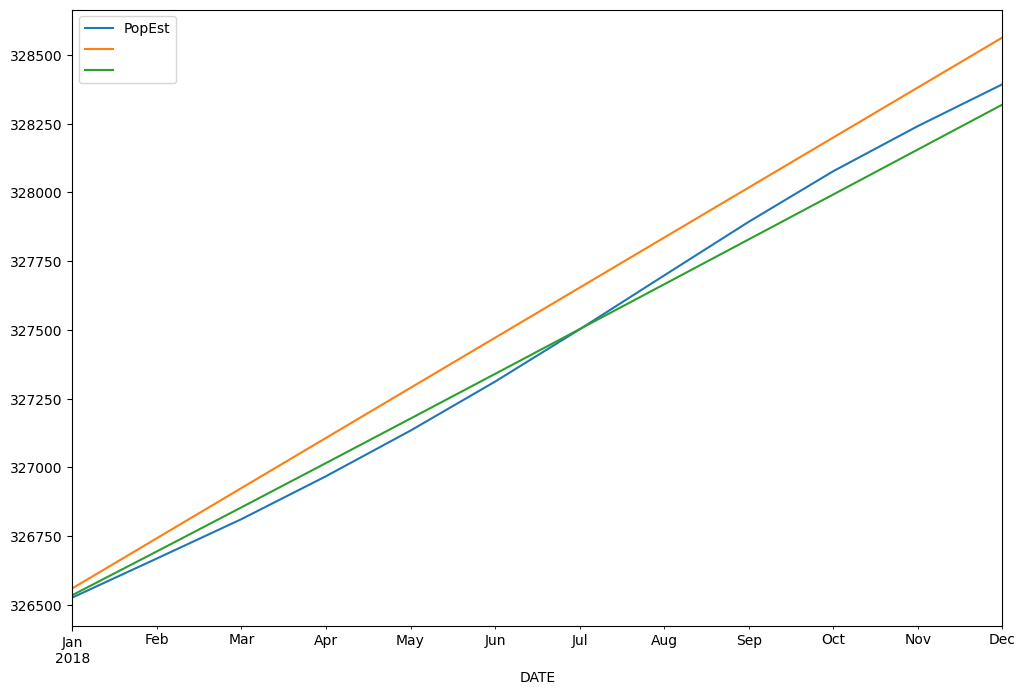

In [13]:
test.plot(figsize=(12,8),legend=True)
prediction1.plot(legend=True)
prediction2.plot(legend=True)

In [17]:
ARfit = AutoReg(train,lags=[1,4,8]).fit()
ARfit.params

const        444.028620
PopEst.L1      1.164478
PopEst.L4     -0.362519
PopEst.L8      0.197400
dtype: float64

In [20]:
prediction8 = ARfit.predict(start,end)
prediction8.rename('Ar8')

2018-01-01    326546.711422
2018-02-01    326709.366167
2018-03-01    326875.574227
2018-04-01    327051.849476
2018-05-01    327235.239610
2018-06-01    327426.939136
2018-07-01    327623.078626
2018-08-01    327818.370007
2018-09-01    328012.603734
2018-10-01    328201.397946
2018-11-01    328382.949812
2018-12-01    328558.362842
Freq: MS, Name: Ar8, dtype: float64

In [18]:
from sklearn.metrics import mean_squared_error

In [21]:
labels = ['AR1', 'AR2', 'AR8']
preds = [prediction1,prediction2,prediction8]

In [22]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{i} error: {error}')

0 error: 17449.71423587912
1 error: 2713.2585540102214
2 error: 11914.528433348272


<Axes: xlabel='DATE'>

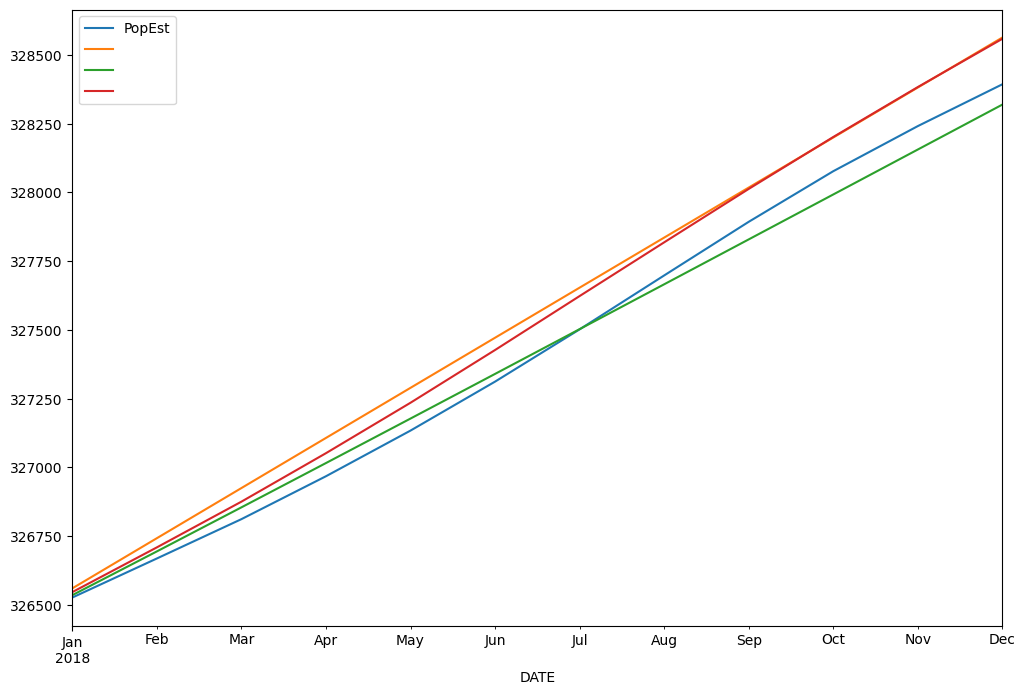

In [23]:
test.plot(figsize=(12,8),legend=True)
prediction1.plot(legend=True)
prediction2.plot(legend=True)
prediction8.plot(legend=True)